# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
rateD = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
rateD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#extracts the url data and stores it
url = r'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)  

#this will seperate the data by the
with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(r.content)

#encode data
images = pd.read_csv("image-predictions.tsv", sep = '\t', encoding = 'utf-8')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy as tw
import os

In [6]:
consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

In [7]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
import json
import sys
import time
import os
tweet_ids = rateD.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
#print(fails_dict)

In [8]:
with open('tweet-json.txt') as file:
    tweets = pd.read_json(file, lines = True)

In [9]:
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
rateD.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
rateD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [16]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [17]:
tweets['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

### Quality issues
1. Redundant retweets rows
2. Redundant “in reply to users’ tweet” rows
3. "rating_numerators" includes values greater than 10
4. Names of dogs are null, but given names of “a” or “an” instead of “None.”
5. "rating_denominator" are not only 10
6. The data types of “timestamp,” “tweet_id” are incorrect
7. The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp variables have a lot of missing data and, moreover, we do not need them for the analysis in tweets and copied dataframe
8. Delete "Source" column in rateD and copied dataframe (too long to of a variable)

### Tidiness issues
1. Create one category meaning we create one column, right now it is “doggo”, “flooter”, “pupper”, “puppo” columns.
2. Remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in tweets dataframe, source from rateD dataframe
3. The datasets are not joined

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
dog  = rateD.copy()
imagesP = images.copy()
tweetscopy = tweets.copy()

### Issue #1:

#### Define: We will be removing the redundant retweets rows in the rateD dataframe (twitter archived data)

#### Code

In [19]:
#finding the index of the retweets we can then remove them from the dataframe
retweetsIdx = list(dog[dog["retweeted_status_id"].isnull()==False].index)
print(len(retweetsIdx), len(dog))

181 2356


In [20]:
#we will now drop them by indexing
#dog = dog.drop(dog[~dog.retweeted_status_id.isin(retweetsIdx)].index.tolist())
dog.drop(axis=0, index=retweetsIdx, inplace=True)
print(len(rateD) - len(dog))

181


#### Test

In [21]:
#we check to see if the retweet in our list is found
for retweet in retweetsIdx:
    if retweet in list(dog.index):
        print('Retweet found: ' + retweet)

### Issue #2:

#### Define: Create one category meaning we create one column, right now it is “doggo”, “flooter”, “pupper”, “puppo” columns.

#### Code

In [22]:
#REFERENCE https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
dog['stage'] = dog[dog.columns[13:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
dog

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"None,None,None,None"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"None,None,None,None"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"None,None,None,None"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"None,None,None,None"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"None,None,None,None"
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,"None,None,None,None"
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,"None,None,None,None"
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,"None,None,None,None"
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,"None,None,None,None"
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,"doggo,None,None,None"


In [23]:
dog['stage'].value_counts()
#1831 rows where there were "None" values in all 4 columns

None,None,None,None        1831
None,None,pupper,None       224
doggo,None,None,None         75
None,None,None,puppo         24
doggo,None,pupper,None       10
None,floofer,None,None        9
doggo,None,None,puppo         1
doggo,floofer,None,None       1
Name: stage, dtype: int64

In [24]:
dog['stage'] = dog['stage'].map(lambda x: x.replace("None,",""))
dog['stage'] = dog['stage'].map(lambda x: x.replace(",None",""))

#### Test

In [25]:
dog['stage'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

### Issue 3: Removing in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns in tweets and tweetscopy

In [26]:
#we isolate the colums we in fact will use
tweets = tweets[['id','favorite_count', 'favorited', 'retweet_count', 'retweeted']]
tweetscopy = tweetscopy[['id','favorite_count', 'favorited', 'retweet_count', 'retweeted']]

#### Test

In [27]:
tweetscopy.head()

,id,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,39467,False,8853,False
1,892177421306343426,33819,False,6514,False
2,891815181378084864,25461,False,4328,False
3,891689557279858688,42908,False,8964,False
4,891327558926688256,41048,False,9774,False


In [28]:
tweets.head()

,id,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,39467,False,8853,False
1,892177421306343426,33819,False,6514,False
2,891815181378084864,25461,False,4328,False
3,891689557279858688,42908,False,8964,False
4,891327558926688256,41048,False,9774,False


### Issue 4: "rating_denominators" includes values with decimals not just whole numbers.

In [29]:
nTen = list(dog.query("rating_denominator != 10").index)
dog.drop(index=nTen, inplace=True)

In [30]:
ratings = dog.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [31]:
dog['rating_denominator'] = (ratings[1])
dog['rating_denominator'] = pd.to_numeric(dog['rating_denominator'])

#### Test

In [32]:
desired_df = dog.loc[dog.rating_denominator%1 != 0].reset_index(drop=True)
len(desired_df)

0

### Issue 5: "rating_numerators" includes values with decimals not just whole numbers.

In [33]:
#there are a lot of numerator values above 10 but lets remove those greater than 20
dog.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [34]:
#drop numerator values greater than 20
m20 = list(dog.query("rating_numerator > 20").index)
dog.drop(index=m20, inplace=True)

In [35]:
ratings = dog.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [36]:
dog['rating_numerator'] = (ratings[0])
dog['rating_numerator'] = pd.to_numeric(dog['rating_numerator'])
dog['rating_numerator'] = dog['rating_numerator'].round()

#### Test

In [37]:
desired_df2 = dog.loc[dog.rating_numerator%1 != 0].reset_index(drop=True)
len(desired_df2)

0

### Issue 6: The data types of “timestamp,” “tweet_id” are incorrect

In [38]:
#convert timestamp to datetime
dog['timestamp'] = pd.to_datetime(dog['timestamp'])
dog['tweet_id'] = dog.tweet_id.astype(str)
imagesP['tweet_id'] = imagesP.tweet_id.astype(str)
tweetscopy['id'] = tweetscopy.astype(str)

#### Test

In [39]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2145 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2145 non-null datetime64[ns]
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2145 non-null float64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
stage                      

### Issue 7: Names of dogs are null, but given names of “a” or “an” instead of “None.”

In [40]:
#count the number of names with a or an
len(dog.query('name == "a" or name == "an"'))

59

In [41]:
#tidy up the data a bit to show top 5 dog names by count
incorrectName= list(dog.query('name == "a" or name == "an"').index)

for i in incorrectName:
    dog['name'][i] = "None"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Test

In [42]:
len(dog.query('name == "a" or name == "an"'))

0

### Issue 8: Delete "Source" column in rateD and dog dataframe (too long to of a variable)

In [43]:
rateD.drop("source",axis=1,inplace=True)
dog.drop("source",axis=1,inplace=True)

#### Test

In [44]:
#we should expect an AttributeError
dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2145 non-null object
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2145 non-null datetime64[ns]
text                          2145 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2145 non-null float64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
stage                         2145 non-null object
dtypes: datetime64[ns](1), 

In [45]:
rateD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 294.6+ KB


## Storing Data/Tidy 
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
twitter_archive_master = pd.merge(dog, imagesP, on='tweet_id')
tweetscopy = tweetscopy.rename(columns={'id': 'tweet_id'})
twitter_archive_master = pd.merge(twitter_archive_master, tweetscopy, on='tweet_id')
twitter_archive_master.to_csv('twitter_archive_master.csv')
#imagesP.to_csv('images-predict.csv')
#tweetscopy.to_csv('tweetscopy.csv')

In [47]:
df = pd.read_csv('twitter_archive_master.csv')
#iP = pd.read_csv('images-predict.csv')
#tweetDf = pd.read_csv('tweets2.csv')
df

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,39467,False,8853,False
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,False,6514,False
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461,False,4328,False
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,False,8964,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,False,9774,False
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,False,3261,False
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,False,2158,False
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,False,16716,False
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,False,4429,False
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,False,7711,False


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight Question 1: What is the most common dog name?

In [48]:
df.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,39467,False,8853,False
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,False,6514,False
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461,False,4328,False
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,False,8964,False
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,False,9774,False


In [49]:
df['name'].value_counts()

None        591
Charlie      11
Oliver       10
Lucy         10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Toby          7
Lola          7
the           7
Daisy         7
Bo            6
Stanley       6
Jax           6
Bella         6
Koda          6
Leo           5
Buddy         5
Oscar         5
Scout         5
Dave          5
Chester       5
Louis         5
Milo          5
Bailey        5
Rusty         5
Larry         4
Scooter       4
           ... 
Arlo          1
Taz           1
Saydee        1
Jaspers       1
BeBe          1
Godi          1
Cecil         1
Happy         1
Jennifur      1
Maya          1
Robin         1
Willem        1
Rontu         1
Dug           1
Kaiya         1
Herschel      1
Danny         1
Amélie        1
Jamesy        1
Jeffrie       1
Mike          1
Chadrick      1
Tino          1
Ike           1
Shelby        1
Cheryl        1
Clarkus       1
Leonidas      1
Mac           1
Fynn          1
Name: name, Length: 930,

In [50]:
#tidy up the data a bit to show top 5 dog names by count
incorrectName= list(df.query('name == "a" or name == "an"').index)

for i in incorrectName:
    df['name'][i] = "None"

In [51]:
#take out 'None' name values
value_list = ["None"]
df2 = ~df.name.isin(value_list)
df2f = df[df2]

In [52]:
df2f['name'].value_counts().nlargest(5)

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Tucker      9
Name: name, dtype: int64

### Insight Question 2: What are the monthly tweet trends with the WeRateDogs Posts?

In [53]:
df = df.drop(columns = ['Unnamed: 0'], axis = 1)
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,...,bagel,0.085851,False,banana,0.076110,False,39467,False,8853,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,False,6514,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,...,malamute,0.078253,True,kelpie,0.031379,True,25461,False,4328,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,False,8964,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,False,9774,False


In [54]:
#convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,favorited,retweet_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,...,bagel,0.085851,False,banana,0.076110,False,39467,False,8853,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,False,6514,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,...,malamute,0.078253,True,kelpie,0.031379,True,25461,False,4328,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,False,8964,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,False,9774,False
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,False,3261,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041,False,2158,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,False,16716,False
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,False,4429,False
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,False,7711,False


In [55]:
#create an activity column (retweets and favourite counts)
df['activity'] = df['favorite_count'] + df['retweet_count']

In [56]:
#https://stackoverflow.com/questions/23840797/convert-a-column-of-timestamps-into-periods-in-pandas
monthlyActivity = df.groupby(df['timestamp'].dt.to_period('M'))['activity'].mean()

In [57]:
monthlyActivity

timestamp
2015-11     1748.370748
2015-12     5046.895604
2016-01     5264.301205
2016-02     5872.954128
2016-03     6327.239316
2016-04     6385.442308
2016-05     8224.714286
2016-06    13254.112500
2016-07     9495.058140
2016-08    13979.305085
2016-09    15218.209677
2016-10    17415.375000
2016-11    19607.773585
2016-12    21878.886792
2017-01    26324.430769
2017-02    23175.296875
2017-03    25296.854167
2017-04    28599.439024
2017-05    35997.093023
2017-06    35712.250000
2017-07    38669.714286
2017-08    44326.500000
Freq: M, Name: activity, dtype: float64

### Insight Question 3: What are the trends with the WeRateDogs Posts (overall number of tweets)?

In [58]:
monthlyActivity2 = df.groupby(df['timestamp'].dt.to_period('M'))['tweet_id'].count()
monthlyActivity2

timestamp
2015-11    294
2015-12    364
2016-01    166
2016-02    109
2016-03    117
2016-04     52
2016-05     56
2016-06     80
2016-07     86
2016-08     59
2016-09     62
2016-10     64
2016-11     53
2016-12     53
2017-01     65
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
Freq: M, Name: tweet_id, dtype: int64

In [59]:
(monthlyActivity2[-1] - monthlyActivity2[0])/monthlyActivity2[-1]

-146.0

### Insights:
1. The top 5 most common Dog Names are Lucy, Charlie, Oliver, Cooper, and Penny

2. The average activity per tweet is growing considerably and has increased activity by more than 20x in nearly 2 years.

3. Looking at the count of tweets/posts being made on the WeRateDogs they are dropped by over 149% yet the activity has increased. Meaning that popularity of the account has allowed the twitter account to be successful even with fewer postings.

### Visualization

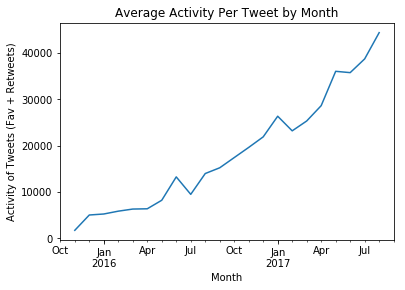

In [60]:
#this is the visualization of Insight Question 2
monthlyActivity.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Activity of Tweets (Fav + Retweets)');